In [25]:
import sys
from pathlib import Path

# Add project root to Python path
project_root = Path.cwd().parent
sys.path.append(str(project_root))

# Library imports
import torch
import matplotlib.pyplot as plt

In [214]:
# Create a dumb dataset to test the PFN
X_train = torch.randn([1,256,7])

# Y_train easy function (lets add some noise too)
y_train = X_train.sum(dim=-1, keepdim=True) + torch.randn([1,256,1]) * 0.3
mean = y_train.mean(dim=1)
std = y_train.std(dim=1)
y_train = (y_train-mean)/std

# Make dummy test set with single variable
X_test = torch.randn([1,1,7])
print(X_test, (X_test.sum(dim=-1)-mean)/std, 0.3/std)

# Add some random features to mess with the model
X_train = torch.cat([X_train, torch.randn_like(X_train)], dim = -1)
X_test = torch.cat([X_test, torch.randn_like(X_test)], dim = -1)
print(X_train.shape, X_test.shape)

tensor([[[ 0.0566,  1.5415, -0.3921, -1.0315,  0.2133,  1.3440,  0.3653]]]) tensor([[0.7838]]) tensor([[0.1081]])
torch.Size([1, 256, 14]) torch.Size([1, 1, 14])


In [ ]:
# Import necessary utilities from my_small_PFN
from scripts.my_small_PFN import ModelConfig, MyRegressorPFN, BucketOps

# Create a default config
config = ModelConfig()
# Set device to CPU
config.device = 'cpu'

# Create a model using the default config
model = MyRegressorPFN(config)

# Load the model weights from storage
state = torch.load("C:/Users/PC/Desktop/TabPFN-Deep-Dive/weights/my_PFN_weights.pth", map_location="cpu", weights_only=True)
model.load_state_dict(state)

<All keys matched successfully>

torch.Size([64])


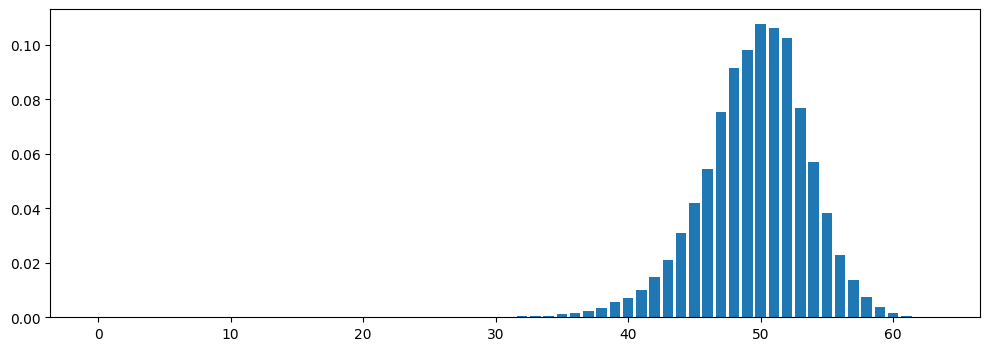

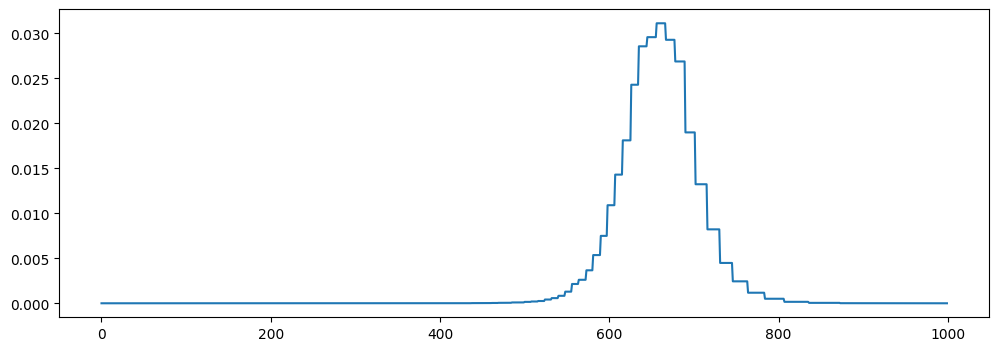

(0.797397792339325, 0.04802507162094116, 0.2191462367773056)


In [215]:
# Obtain probabilities on dummy test vector
with torch.no_grad():
    probs = model.fit(X_train, y_train).predict(X_test, output='probs').squeeze(0).squeeze(0)
print(probs.shape)

# Plot histogram
plt.figure(figsize=(12, 4))
plt.bar(range(config.n_buckets), probs)
plt.show()

# Plot distribution
plt.figure(figsize=(12, 4))
plt.plot(BucketOps.probs_to_distribution_plot(probs, torch.arange(0,1000)/200-2.5))
plt.show()

# Print Values
print(BucketOps.probs_to_mean_var_std(probs))